# Basic Python & Numpy

## Common Python syntax

Python is a rather friendly language with syntax close to normal written english.

We will be using a number of features of Python - including

- Basic types: ints, floats, strs, lists, tuples, dictionaries
- Control flow: If/else, for, while
- Functions

Python is very lax with types, e.g we can add integers and floats together and 
Python will automatically sort out the details

In [1]:
a = 1
b = 1.0
c = a + b 
print(c)

2.0


It is often convenient to use container types such as lists, dictionaries or tuples

In [2]:
my_list = [1, 2, 'tamal']
print(my_list)

[1, 2, 'tamal']


In [41]:
my_tuple = [3, 4, 'frijolitos']
print(my_tuple)

[3, 4, 'frijolitos']


In [40]:
my_breakfast_order_dict = {'name': 'tamal', 'amount': 3, 'type': "elote"}
print(my_breakfast_order_dict)

{'name': 'tamal', 'amount': 3, 'type': 'elote'}


Control flow statements are used to.. control the flow of a program

In [12]:
for thing in my_list:
    print(thing)

1
2
tamal


In [9]:
for i in range(4):
    if i == 0:
        print('I am hungry')
    elif i == 1:
        print('I would like to eat tamales de elote')
    elif i == 2:
        print('With some frijolitos')
    else:
        print('Que rico!')
    

I am hungry
I would like to eat tamales de elote
With some frijolitos
Que rico!


Functions are nice tools to avoid repeating code and to separate code into chunks that each 
have a distinct objective. 

Say we are interested in prime numbers and our objective is to plot the distribution 
of prime numbers below some upper limit $n$. In this case we might define two functions

- One to compute all the primes below $n$. 
- Another to plot these in our preferred way. 

Rather than some giant function or script/block/cell. 

In [37]:
# These are examples of imports. 
# They are used to bring in code from other files or libraries.
# The first import is from the Python Standard Library and is always available.
# The second import is from the matplotlib library, which is not always available 
# and needs to be installed e.g. using 'pip install matplotlib'.
from math import sqrt, floor 
import matplotlib.pyplot as plt


def sieve_of_eratosthenes(n):
    """
    Implementation of the Sieve of Eratosthenes algorithm to find all primes up to n.
    """
    numbers = list(range(2, n+1))
    bool_list = [True for i in range(2, n+1)]

    for i in range(2, floor(sqrt(n))):
        if bool_list[i]:
            for j in range(i*i, n, i):
                index = numbers.index(j)
                bool_list[index] = False

    primes = [p for p, b in zip(numbers, bool_list) if b]
    return primes

def plot_primes(primes):
    """
    Plot the primes using matplotlib.
    """
    fig, ax = plt.subplots(figsize=(12, 4))
    ax.bar(primes, height=1, width=1)
    return fig

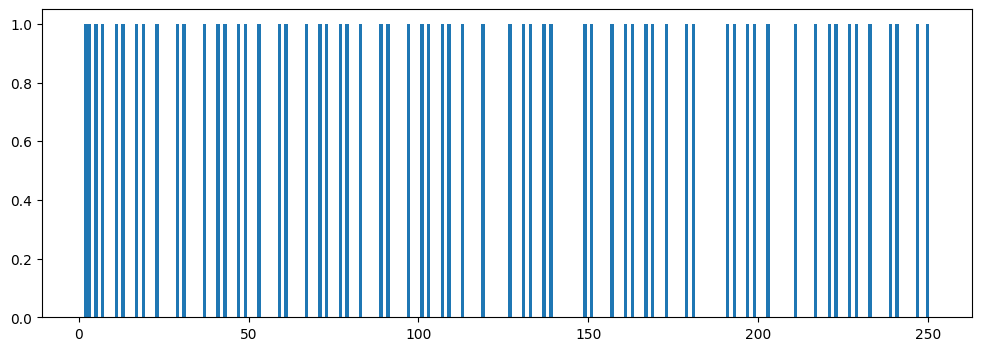

In [59]:
primes = sieve_of_eratosthenes(250)
fig = plot_primes(primes)

There is general not a specific right way of doing this and it is something 
that you will learn as you write more code. However, it is something to keep in mind! 

If you are just doing something quick and dirty it doesn't really matter, but if there is a chance 
you will reuse or iterate on the code then it is immensely helpful! 

- When collaborating with others functions make it much easier for others to understand what a piece of code does. 
- Even when not collaborating with others you may have to come back and understand your own code at a later time - you are effectively collaborating with your future self so make it easy for yourself by writing functions.
- For a large project you might discover later on that some part of the code you wrote earlier is a bottleneck, it is much easier to change that if your code consists of seperate functions rather than a monolith of code. 

The same applies to classes, which are covered in another notebook.

### Exercise: Understanding the Sieve of Eratosthenes

Read the `sieve_of_eratosthenes`-function and try to understand what it does 
line for line. Feel free to discuss in small groups. 

## Numpy

Numpy is likely the most commonly used package for scientific computing in Python. 
To use numpy we first need to import it

In [10]:
import numpy as np

After which we have access to numpy functions and classes, the most important 
thing being the `array`

In [11]:
my_array = np.array([1, 2, 3, 4, 5])
print(my_array)

[1 2 3 4 5]


When data is stored in arrays high-performance routines can be used for many operations

In [15]:
s = np.sum(my_array)
p = np.prod(my_array)
g = np.mean(my_array)
print(s, p, g)

15 120 3.0


### Exercise: Summation using standard Python vs. Numpy.

Above I said numpy offers 'high-performance routines', in this exercise we will explore 
that a little bit. 

You must write two functions 

- `sum_list_of_numbers`: That takes a list of numbers as input and returns the sum. Write this using a for loop.
- `sum_array_of_numbers`: This function should take an array of numbers and return the sum. Do not use a for-loop here!

In [43]:
def sum_list_of_numbers(numbers):
    """
    Sum a list of numbers.
    """
    total = 0
    for number in numbers:
        total += number
    return total

def sum_array_of_numbers(numbers):
    """
    Sum an array of numbers.
    """
    return np.sum(numbers)

The code below tests these functions

In [54]:
def get_random_numbers(n):
    """
    Get n random numbers.
    """
    array = np.random.uniform(0, 100, n)
    return array, list(array)

N = 10000000
array_of_numbers, list_of_numbers = get_random_numbers(N)

In [55]:
%timeit sum_list_of_numbers(list_of_numbers)

227 ms ± 2.74 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [56]:
%timeit sum_array_of_numbers(array_of_numbers)

1.29 ms ± 5.71 μs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


On my machine I find that Numpy is around ~175 times faster than regular Python.
The reason for this is that we are paying for the friendliness of Python. 
Everytime we say `a + b` Python will check the types of `a` and `b` and use that 
to determine if it knows how to add these two types together and how to do so. 

With Numpy the entire array is already known to have numbers of the same type and 
the array is given to a C or Fortran program that does the actual summation. 

### Exercise: Root finding, free energy and phase transitions.

In [76]:
import numpy as np
from scipy.optimize import root
import matplotlib.pyplot as plt

The Gibbs free energy of different phases of a material may be used to calculate 
the temperature at which a phase transition occurs. 

We will decide that for the material we are interested in the Gibbs free energy as a 
function of temperature may be described using the following expression 

$$
G(T) = a + b T + c T \log(T)
$$
Where $a$, $b$ and $c$ are phase specific constants. Our goal is to find the temperature 
at which a phase transition occurs. The phase that has the lowest Gibbs free energy 
is the one that is thermodynamically favourable, so we need to find the temperature at 
which 

$$
G_1(T) = G_2(T)
$$



The phase-dependent constants for the two phases of interest are

| Phase | a | b | c | 
| -----|----|---|---|
|   1  |  -50 | 0.1  | 0.02 |
|   2  |  -21 | 0.05  | 0.01 |

Start by defining functions for calculating the free energy of each phase.

In [97]:
def G1(T):
    a1, b1, c1 = -50, 0.1, 0.02
    return a1 + b1 * T + c1 * T * np.log(T)

def G2(T):
    a2, b2, c2 = -21, 0.05, 0.01
    return a2 + b2 * T + c2 * T * np.log(T)

The cell below defines a function to plot the two free energies. Inspect 
the plot and think whether or not it makes sense? 

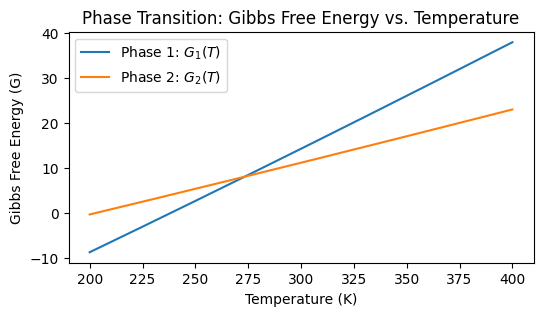

In [98]:
def plot_free_energy(T_transition=None):
    T_vals = np.linspace(200, 400, 500)
    G1_vals = G1(T_vals)
    G2_vals = G2(T_vals)

    fig, ax = plt.subplots(figsize=(6, 3))

    ax.plot(T_vals, G1_vals, label="Phase 1: $G_1(T)$")
    ax.plot(T_vals, G2_vals, label="Phase 2: $G_2(T)$")
    ax.set_xlabel("Temperature (K)")
    ax.set_ylabel("Gibbs Free Energy (G)")
    ax.legend()
    ax.set_title("Phase Transition: Gibbs Free Energy vs. Temperature")

    if T_transition is not None:
        ax.axvline(T_transition, color='red', linestyle='--', label=f"Transition Temperature: {T_transition:.2f} K")


    plt.show()

plot_free_energy()

As we said above the transition occurs when $G_1(T) = G_2(T)$ so we can find it by finding 
the root of the equation

$G_1(T) - G_2(T) = 0$

To solve this you should; 

1. Implement a function that takes $T$ as input and returns $G_1(T) - G_2(T)$.
2. Use `root` from Scipy to find the root. 

Hint: Use the `root` functions [documentation](https://docs.scipy.org/doc/scipy-1.15.0/reference/generated/scipy.optimize.root.html) to understand how to use it. 

In [ ]:
# Define the equation G1(T) - G2(T) = 0
def phase_transition_eq(T):
    return G1(T) - G2(T)

# Solve for the root (transition temperature)
initial_guess = 300  # Initial temperature guess
solution = root(phase_transition_eq, initial_guess)

The cell below will print the transition temperature if everything has worked out so far. 

In [99]:
# Display the result
if solution.success:
    T_transition = solution.x[0]
    print(f"The phase transition temperature is approximately {T_transition:.2f} K.")
else:
    print("Root finding did not converge.")

The phase transition temperature is approximately 273.31 K.


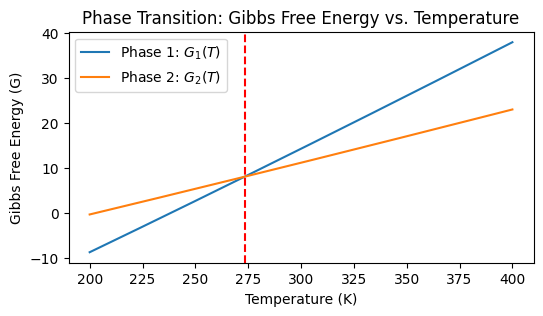

In [101]:
plot_free_energy(T_transition)